In [1]:
import pandas as pd 

data = pd.read_csv("Data/2008_births.csv")
data


,INST,RPLACE,RCOUNTY,PLURAL,BDATE,BMONTH,BDAY,BYEAR,SEX,RACE,...,MOTHERTR,IANEMIA,BINJURY,FAS,HYALINE,ASPIRATE,VENTLESS,VENTMORE,ISEIZURE,OTHINF
0,1,6800,68,1,2008-01-01,1,1,2008,2,1,...,2,0,0,0,0,0,0,0,0,0
1,1,160,1,1,2008-01-02,1,2,2008,2,2,...,2,0,0,0,0,0,0,0,0,0
2,1,190,1,1,2008-01-02,1,2,2008,1,1,...,2,0,0,0,0,0,0,0,0,0
3,1,4100,41,1,2008-01-03,1,3,2008,2,1,...,2,0,0,0,0,0,0,0,0,0
4,1,160,1,1,2008-01-03,1,3,2008,2,1,...,2,0,0,0,0,0,0,0,0,0
5,1,100,1,1,2008-01-03,1,3,2008,2,1,...,2,0,0,0,0,0,0,0,0,0
6,1,100,1,1,2008-01-03,1,3,2008,1,1,...,2,0,0,0,0,0,0,0,0,0
7,1,100,1,2,2008-01-03,1,3,2008,1,1,...,2,0,0,0,0,0,0,0,0,0
8,1,100,1,2,2008-01-03,1,3,2008,2,1,...,2,0,0,0,0,0,0,0,0,0
9,1,162,1,1,2008-01-03,1,3,2008,2,2,...,2,0,0,0,0,0,0,0,0,0


In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split


In [3]:
#birthweight is what we want to predict - change this to single target 
birth_weight = data[['BPOUND', 'BOUNCE']] 

In [4]:
#PCA might be a good technique to select predictors 

#note that PCA performs best when data is normalized (range b/w 0 and 1)

#It is possible to use categorical and continuous predictors 
#for a regression problem. My understanding is you need to make 
#dummy variables for the binary predictors. 

#Variables that we will need to deal with: 
# BDATE, HISPMOM, HISPDAD

In [5]:
#Attempting PCA on data
#for now I drop the BDATE, HISPMOM AND HISPDAD
data_drop = data.drop(["BDATE", "HISPMOM", "HISPDAD", "BOUNCE", "BPOUND"], axis = 1) #axis = 1 means to drop column not row

In [6]:
#get a list of columns in pandas object 
names_of_data = data_drop.columns.tolist()

#shuffle = false prevents data split being different everytime
X_train, X_test, y_train, y_test = train_test_split(data_drop, birth_weight, test_size = 0.2, shuffle = False)

#split test into validate and test, again making sure the data is always the same for consistency
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, shuffle = False)

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#running the actual PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#relief f algorithm - sorting features 

In [7]:
explained_variance = pca.explained_variance_ratio_
print(len(explained_variance))
print(explained_variance)

120
[3.89856404e-02 3.41089470e-02 3.05310536e-02 2.86690661e-02
 2.39828710e-02 2.07124228e-02 1.81565355e-02 1.70798239e-02
 1.68763289e-02 1.59961073e-02 1.56220702e-02 1.35585642e-02
 1.30251204e-02 1.13087563e-02 1.10457470e-02 1.09427186e-02
 1.06522571e-02 1.03091115e-02 1.02034145e-02 1.01603763e-02
 9.98586972e-03 9.86404012e-03 9.78778404e-03 9.61165628e-03
 9.46902421e-03 9.40630729e-03 9.25092446e-03 9.20797437e-03
 9.16882901e-03 9.11728971e-03 9.08471022e-03 9.05880935e-03
 8.91090184e-03 8.85632587e-03 8.83902308e-03 8.82366452e-03
 8.73228213e-03 8.70972804e-03 8.64475483e-03 8.63888132e-03
 8.60300393e-03 8.57402898e-03 8.54542908e-03 8.51710741e-03
 8.50298288e-03 8.46111398e-03 8.42122923e-03 8.39505222e-03
 8.37548109e-03 8.34046815e-03 8.29732609e-03 8.28947627e-03
 8.24895028e-03 8.22904830e-03 8.20238682e-03 8.12690154e-03
 8.11341630e-03 8.08291392e-03 8.07851589e-03 8.03763212e-03
 8.01473052e-03 7.96613523e-03 7.90999598e-03 7.89944166e-03
 7.83600377e-03 7.82

In [8]:
#Explained variance prints the variance each principal component contributes.
#As we can see, the last 5 contribute very little (maybe we can get rid of?)

#We also want to check for linearity between the input predictors and the output 
#If there is high colinearity, then we want to use ridge regression - A variant of lin regression that has regulatization

#Correlation indicates strength and direction of a linear relationship. let's use this on the predictors 

In [18]:
y_train = y_train["BPOUND"]+y_train["BOUNCE"]*0.0625

In [52]:
y_test = y_test ["BPOUND"]+y_test["BOUNCE"]*0.0625

In [53]:
from sklearn.linear_model import LogisticRegression


In [54]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train )

/Users/hibamahmood/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [11]:
X_train.shape

(106737, 120)

In [12]:
y_train.shape

(106737, 2)

In [14]:
birth_weight

,BPOUND,BOUNCE
0,4,1
1,8,3
2,9,0
3,7,6
4,9,7
5,6,8
6,5,8
7,5,2
8,4,15
9,7,4


In [50]:
from sklearn.ensemble import RandomForestRegressor


In [37]:
regr = RandomForestRegressor(max_depth=7, random_state=0)

In [44]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [55]:
regr.score(X_test,y_test)

-17.37668074387162

In [ ]:
import matplotlib.pyplot as plt

In [56]:
y_predict = regr.predict(X_test)

In [ ]:
print(y_train)

(0, 20)

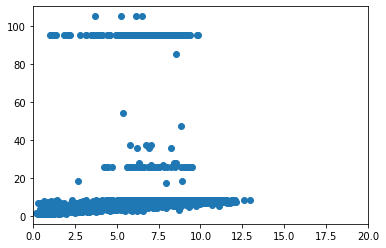

In [57]:
plt.scatter(y_test,y_predict)
plt.xlim(0, 20)